In [1]:
#.. April 22.nd, this file first seeing the coefficients between 4 regimes for 18 models;

import netCDF4
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl 
import xarray as xr

import pandas as pd
import glob
from scipy.stats import *
from copy import deepcopy
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

from scipy.optimize import curve_fit
import seaborn as sns
from useful_func_cy import *
import cartopy.crs as ccrs   #..projection method
import cartopy.feature as cfeat

from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter   #..x,y --> lon, lat
# from minisom import MiniSom

In [2]:
!kernel info


/bin/bash: kernel: command not found


In [3]:
# deck_nas  = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM2', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0']
deck_nas  =    ['CESM2', 'CanESM5', 'BCCESM1']
exp = 'piControl'

ACCESSCM2 = {'modn': 'ACCESS-CM2', 'consort': 'CSIRO-ARCCSS', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}#..dont have 'clwvi' variable, even in esgf-node website
BCCESM1 = {'modn': 'BCC-ESM1', 'consort': 'BCC', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CAMSCSM1 = {'modn': 'CAMS-CSM1-0', 'consort': 'CAMS', 'cmip': 'cmip6',
        'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

CanESM5 = {'modn': 'CanESM5', 'consort': 'CCCma', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2 = {'modn': 'CESM2', 'consort': 'NCAR', 'cmip': 'cmip6',
         'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2FV2 = {'modn': 'CESM2-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
         'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

CESM2WACCM = {'modn': 'CESM2-WACCM', 'consort': 'NCAR', 'cmip': 'cmip6',
         'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CNRMCM6 = {'modn': 'CNRM-CM6-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}# time doesn't corresponding for 'evspsbl' in  'pi-Control' exper
CNRMESM2 = {'modn': 'CNRM-ESM2-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
           'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
E3SM10 = {'modn': 'E3SM-1-0', 'consort': 'E3SM-Project', 'cmip': 'cmip6',
          'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
FGOALSg3 = {'modn': 'FGOALS-g3', 'consort': 'CAS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GFDLCM4 = {'modn': 'GFDL-CM4', 'consort': 'NOAA-GFDL', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
# repaired Dec.30th

GISSE21G = {'modn': 'GISS-E2-1-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21H = {'modn': 'GISS-E2-1-H', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

HADGEM3 = {'modn': 'HadGEM3-GC31-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
           'exper': 'abrupt-4xCO2', 'ensmem': 'r1i1p1f3', 'gg': 'gn', "typevar": 'Amon'}   #  Be careful, failure due to 'day time representation'
HADGEM3 = {'modn': 'HadGEM3-GC31-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
            'exper': 'piControl', 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}   #..missing 'wap' in 'piControl' exp

INM_CM48 = {'modn': 'INM-CM4-8', 'consort': 'INM', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
INM_CM50 = {'modn': 'INM-CM5-0', 'consort': 'INM', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}#..'/glade/' dont have 'Amon' typevar

IPSLCM6ALR = {'modn': 'IPSL-CM6A-LR', 'consort': 'IPSL', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

MPIESM12LR = {'modn': 'MPI-ESM1-2-LR', 'consort': 'MPI-M', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MIROC6 = {'modn': 'MIROC6', 'consort': 'MIROC', 'cmip': 'cmip6',
          'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MIROCES2L= {'modn': 'MIROC-ES2L', 'consort': 'MIROC', 'cmip': 'cmip6',
          'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}   # dont have
MRIESM20 = {'modn': 'MRI-ESM2-0', 'consort': 'MRI', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NORESM2LM = {'modn': 'NorESM2-LM', 'consort': 'NCC', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}# 'pr' variable start at 130th yr in 'abrupt-4xCO2', while other variable start at 0th yr

SAM0={'modn': 'SAM0-UNICON', 'consort': 'SNU', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}


UKESM10 = {'modn': 'UKESM1-0-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}   # the same day time representation issue as 'HadGEM3'
AWICM11MR = {'modn': 'AWI-CM-1-1-MR', 'consort': 'AWI', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}#..'abrupt-4xCO2' missing variables
CMCC = {'modn': 'CMCC-CM2-SR5', 'consort': 'CMCC', 'cmip': 'cmip6',
        'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'} #..'/glade/' dont have 'abrupt-4xCO2'/'piControl' exper
ECE = {'modn': 'EC-Earth3', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'} #..dont have 'Amon' or variable 'tas'
#ECE has different variants for exper
ECEV = {'modn': 'EC-Earth3-Veg', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}#..too hard to operate
#ECEV has very discrete year in 'abrupt-4xCO2', seems continued but each in one yr file in 'piControl'


In [5]:
deck2 = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM2, GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0, E3SM10, FGOALSg3, GFDLCM4, CAMSCSM1,INM_CM48, MPIESM12LR]   #..current # 18 
deck_nas2 = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM2', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0', 'E3SM10', 'FGOALSg3', 'GFDLCM4', 'CAMSCSM1','INM_CM48', 'MPIESM12LR']
#.. 17 models now
# deck2 = [CESM2, CanESM5, BCCESM1]
# deck_nas2 = ['CESM2', 'CanESM5', 'BCCESM1']

path1 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/data_file/'
path6 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/plot_file/'

In [6]:
## PLot 1 # read data for ordinary, 1-lrm(not best):

deck  = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM2, E3SM10, GFDLCM4,GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0]
#deck   =  [CESM2]
output_ARRAY = {}
output_intermedia = {}
output_GMT =  {}
output_2lrm_predict  = {}
output_2lrm_report   = {}

output_dict0_PI =  {}
output_dict0_abr = {}
output_LRM_le = {}
output_LRM_lt = {}

shape_yr_modelPI =  {}
shape_yr_modelabr = {}

output_2lrm_flavra_abr =  {}
output_2lrm_flavra_PI  =  {}   # was monthly data in this case
output_2lrm_yr_bin_abr =  {}
output_2lrm_yr_bin_PI  =  {}
output_2lrm_mon_bin_abr =  {}
output_2lrm_mon_bin_PI  =  {}

output_2lrm_mon_bin_LWPpredi_PI =  {}
output_2lrm_mon_bin_LWPpredi_abr = {}

output_2lrm_dX_dTg = {}

Tr_sst =  0.0
for i in range(len(deck2)):
    
#     folder_2lrm = glob.glob(path1+deck2[i]['modn']+'_best(test5)fit_' +'*' +'_dats.npz')
#     if len(folder_2lrm[1]) <  len(folder_2lrm[0]):
#         folder_best2lrm = folder_2lrm[1]
#     else:
#         folder_best2lrm = folder_2lrm[0]
#     print(folder_best2lrm)
    
#     output_ARRAY[deck_nas2[i]] =  load(folder_best2lrm, allow_pickle=True)  #+'_'+str(Tr_sst)

    output_ARRAY[deck_nas2[i]] =  np.load(path1+deck2[i]['modn']+'mond_'+str(Tr_sst)+'_dats.npz', allow_pickle=True)  #+'_'+str(Tr_sst)
    output_intermedia[deck_nas2[i]]  = output_ARRAY[deck_nas2[i]]['rawdata_dict']
    
    output_GMT[deck_nas2[i]]  =   output_intermedia[deck_nas2[i]][()]['GMT']
    output_2lrm_predict[deck_nas2[i]]  =   output_intermedia[deck_nas2[i]][()]['predict_lwp']
    output_2lrm_report[deck_nas2[i]]  =   output_intermedia[deck_nas2[i]][()]['report_lwp']

    output_dict0_PI[deck_nas2[i]]  =   output_intermedia[deck_nas2[i]][()]['dict0_PI_var']
    output_dict0_abr[deck_nas2[i]]  =   output_intermedia[deck_nas2[i]][()]['dict0_abr_var']
    shape_yr_modelPI[deck_nas2[i]]   =  output_dict0_PI[deck_nas2[i]]['shape_yr']
    shape_yr_modelabr[deck_nas2[i]]   =  output_dict0_abr[deck_nas2[i]]['shape_yr']
    output_LRM_le[deck_nas2[i]] =  output_intermedia[deck_nas2[i]][()]['LRM_le']
    output_LRM_lt[deck_nas2[i]] =  output_intermedia[deck_nas2[i]][()]['LRM_st']
    
    # Flattened monthly data
    output_2lrm_flavra_PI[deck_nas2[i]]  =   output_intermedia[deck_nas2[i]][()]['dict2_predi_fla_PI']
    output_2lrm_flavra_abr[deck_nas2[i]]  =   output_intermedia[deck_nas2[i]][()]['dict2_predi_fla_abr']
    # monthly data
    output_2lrm_mon_bin_PI[deck_nas2[i]]  =   output_dict0_PI[deck_nas2[i]]['dict1_mon_bin_PI']
    output_2lrm_mon_bin_abr[deck_nas2[i]]  =  output_dict0_abr[deck_nas2[i]]['dict1_mon_bin_abr']
    # Annually data
    output_2lrm_yr_bin_PI[deck_nas2[i]]  =   output_dict0_PI[deck_nas2[i]]['dict1_yr_bin_PI']
    output_2lrm_yr_bin_abr[deck_nas2[i]]  =  output_dict0_abr[deck_nas2[i]]['dict1_yr_bin_abr']

    # Predicted monthly data
    output_2lrm_mon_bin_LWPpredi_PI[deck_nas2[i]] =  output_intermedia[deck_nas2[i]][()]['LWP_predi_bin_PI']
    output_2lrm_mon_bin_LWPpredi_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['LWP_predi_bin_abr']
    
    
    # Output dX changes to d(gmt) warming:
    output_2lrm_dX_dTg[deck_nas2[i]]   =  output_intermedia[deck_nas2[i]][()]['dX_dTg']
    
print(shape_yr_modelPI, shape_yr_modelabr)

FileNotFoundError: [Errno 2] No such file or directory: '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/data_file/BCC-ESM1mond_0.0_dats.npz'

In [7]:
## PLot 1' # read data for best fit, 4-lrm:

# deck  = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM2, E3SM10, GFDLCM4,GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0]
#deck   =  [CESM2]

output_ARRAY_best4 = {}
output_intermedia_best4 = {}

output_dict0_PI_best4 =  {}
output_dict0_abr_best4 = {}

output_coef_dict_4lrm = {}

output_Predict_dict_PI_4lrm = {}
output_Predict_dict_abr_4lrm = {}
output_stats_dict_PI_4lrm = {}
output_stats_dict_abr_4lrm = {}

output_4lrm_predict  = {}
output_4lrm_report   = {}

# BIN Datas:
output_4lrm_flavra_PI =  {}
output_4lrm_flavra_abr = {}

output_4lrm_yr_bin_abr =  {}
output_4lrm_yr_bin_PI  =  {}
output_4lrm_mon_bin_abr =  {}
output_4lrm_mon_bin_PI  =  {}

output_4lrm_mon_bin_LWPpredi_PI =  {}
output_4lrm_mon_bin_LWPpredi_abr = {}

# Tr_sst =  0.0
# TR_sub  =  0.0

for j in range(len(deck2)):
    
    folder_4lrm =  glob.glob(path1 +deck2[j]['modn']+'_best(test5)fit_'+'*K'+'_ud'+'*'+'_dats.npz')
    print(folder_4lrm)
    
    output_ARRAY_best4[deck_nas2[j]] = np.load(folder_4lrm[0], allow_pickle=True)  # str(TR_sst)+str(TR_sub) 
    output_intermedia_best4[deck_nas2[j]]  = output_ARRAY_best4[deck_nas2[j]]['rawdata_dict']
    

    output_4lrm_predict[deck_nas2[j]]  =   output_intermedia_best4[deck_nas2[j]][()]['predict_lwp']
    output_4lrm_report[deck_nas2[j]]  =   output_intermedia_best4[deck_nas2[j]][()]['report_lwp']
    
    output_dict0_PI_best4[deck_nas2[j]]  =   output_intermedia_best4[deck_nas2[j]][()]['dict1_PI_var']
    output_dict0_abr_best4[deck_nas2[j]]  =   output_intermedia_best4[deck_nas2[j]][()]['dict1_abr_var']
    output_coef_dict_4lrm[deck_nas2[j]] =  output_intermedia_best4[deck_nas2[j]][()]['Coef_dict']   # changed
    output_Predict_dict_PI_4lrm[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['Predict_dict_PI']
    output_Predict_dict_abr_4lrm[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['Predict_dict_abr']
    output_stats_dict_PI_4lrm[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['stats_dict_PI']
    output_stats_dict_abr_4lrm[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['stats_dict_abr']

    # Flattened monthly data
    output_4lrm_flavra_PI[deck_nas2[j]]  =   output_intermedia_best4[deck_nas2[j]][()]['dict2_predi_fla_PI']
    output_4lrm_flavra_abr[deck_nas2[j]]  =   output_intermedia_best4[deck_nas2[j]][()]['dict2_predi_fla_abr']
    
    # monthly data
    output_4lrm_mon_bin_PI[deck_nas2[j]]  =   output_dict0_PI_best4[deck_nas2[j]]['dict1_mon_bin_PI']
    output_4lrm_mon_bin_abr[deck_nas2[j]]  =  output_dict0_abr_best4[deck_nas2[j]]['dict1_mon_bin_abr']
    # Annually data
    output_4lrm_yr_bin_PI[deck_nas2[j]]  =   output_dict0_PI_best4[deck_nas2[j]]['dict1_yr_bin_PI']
    output_4lrm_yr_bin_abr[deck_nas2[j]]  =  output_dict0_abr_best4[deck_nas2[j]]['dict1_yr_bin_abr']

    # Predicted monthly data
    output_4lrm_mon_bin_LWPpredi_PI[deck_nas2[j]] =  output_intermedia_best4[deck_nas2[j]][()]['LWP_predi_bin_PI']
    output_4lrm_mon_bin_LWPpredi_abr[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['LWP_predi_bin_abr']

['/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/data_file/BCC-ESM1_best(test5)fit_270.46K_ud-0.16_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/data_file/CanESM5_best(test5)fit_268.7K_ud-0.03_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/data_file/CESM2_best(test5)fit_271.79K_ud1.0_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/data_file/CESM2-FV2_best(test5)fit_269.39K_ud1.26_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/data_file/CESM2-WACCM_best(test5)fit_271.88K_ud1.0_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/data_file/CNRM-ESM2-1_best(test5)fit_262.63K_ud-1.9_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/data_file/GISS-E2-1-G_best(test5)fit_271.43K_ud-0.06_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/data_file/GISS-E2-1-H_best(test5)fit_275.17K_u

In [8]:
print(nanmean(output_Predict_dict_abr_4lrm['CESM2']['label']))

2.0201176994213936


In [9]:
def rdlrm_4_training(X_dict, cut_off1, cut_off2, predictant = 'LWP', CCFs = ['SST', 'p_e', 'LTS', 'SUB'], r = 4):
    
    # 'predict_dict' is a dictionary to store the 'predict_label_LWP' and 'predict_value_LWP'
    predict_dict  = {}

    # 'predict_label_LWP' is an array to store the regimes_label
    predict_label_LWP = zeros((X_dict['SST'].shape[0]))
    
    # 'predict_value_LWP' is an array to store the predicted LWP
    predict_value_LWP = zeros((X_dict['SST'].shape[0]))

    # 'predictors' is an array that has the need predictors in flatten format;
    predictors = []

    for i in range(len(CCFs)):
        predictors.append(X_dict[CCFs[i]] *1.)
    predictors = asarray(predictors)
    # print(predictors.shape)  # (4, ..)

    shape_fla_training = X_dict[predictant].shape
    print('shape1: ', shape_fla_training)   # shape1

    print('4LRM: HERE TR_sst = ', cut_off1, 'K')  #.. # of total flatten points
    print('4LRM:  ... TR_sub = ', cut_off2, 'Pa s-1')

    # Detecting nan values in the CCFs metrics
    Z  = X_dict['LTS'] * 1. 

    for j in range(len(CCFs)):
        Z  =  Z * predictors[j, :]

    Z = Z * (X_dict[predictant]* 1.)
    ind_false = isnan(Z)

    ind_true = logical_not(ind_false)
    print('shape2: ', asarray(nonzero(ind_true==True)).shape)  #.. # of 'non-nan' 
    
    # Replace 'nan' value in right place
    predict_label_LWP[ind_false] = 0
    predict_value_LWP[ind_false] = nan

    
    # Split data with skin Temperature (SST) Larger\Equal and Less than Cut_off1
    ind_hot  = X_dict['SST'] >= cut_off1
    ind_cold = X_dict['SST'] < cut_off1
    # Split data with 500mb Subsidence (SUB) Less\Equal and Larger than Cut_off2
    ind_up   = X_dict['SUB'] <= cut_off2
    ind_down = X_dict['SUB'] > cut_off2
    
    ind7 = ind_true & ind_cold & ind_up
    ind8 = ind_true & ind_hot & ind_up
    
    ind9 = ind_true & ind_cold & ind_down
    ind10 = ind_true & ind_hot & ind_down

    
    Regimes  = [ind7, ind8, ind9, ind10]
    print(' Total # of regime', len(Regimes))
    
    #.. Multiple linear regreesion of Liquid Water Path to CCFs:

    
    # train model with SST < TR_sst, unit in K
    if (len(ind7)!=0) & (len(ind8)!=0) & (len(ind9)!=0) & (len(ind10)!=0):
        regr7 = linear_model.LinearRegression()
        result7 = regr7.fit(predictors[:][0:len(CCFs), ind7].T, X_dict[predictant][ind7])   #..regression for LWP WITH LTS and skin-T < TR_sst & 'up'
        aeffi = result7.coef_
        aintp = result7.intercept_
        
        regrL17 = linear_model.Lasso(alpha=.008, fit_intercept=True)
        resultL17 = regrL17.fit(predictors[:][0:len(CCFs), ind7].T, X_dict[predictant][ind7])   #..regression for LWP WITH LTS and skin-T < TR_sst & 'up'
        aeffi_L1 = resultL17.coef_
        aintp_L1 = resultL17.intercept_
        
        regrL27 = linear_model.Ridge(alpha=2000, fit_intercept=True)
        resultL27 = regrL27.fit(predictors[:][0:len(CCFs), ind7].T, X_dict[predictant][ind7])   #..regression for LWP WITH LTS and skin-T < TR_sst & 'up'
        aeffi_L2 = resultL27.coef_
        aintp_L2 = resultL27.intercept_
        
        regr8 = linear_model.LinearRegression()
        result8 = regr8.fit(predictors[:][0:len(CCFs), ind8].T, X_dict[predictant][ind8])   #..regression for LWP WITH LTS and skin-T >= TR_sst &'up'
        beffi = result8.coef_
        bintp = result8.intercept_
        
        regrL18 = linear_model.Lasso(alpha=.008, fit_intercept=True)
        resultL18 = regrL18.fit(predictors[:][0:len(CCFs), ind8].T, X_dict[predictant][ind8])   #..regression for LWP WITH LTS and skin-T < TR_sst & 'up'
        beffi_L1 = resultL18.coef_
        bintp_L1 = resultL18.intercept_
        
        regrL28 = linear_model.Ridge(alpha=2000, fit_intercept=True)
        resultL28 = regrL28.fit(predictors[:][0:len(CCFs), ind8].T, X_dict[predictant][ind8])   #..regression for LWP WITH LTS and skin-T < TR_sst & 'up'
        beffi_L2 = resultL28.coef_
        bintp_L2 = resultL28.intercept_

        regr9 = linear_model.LinearRegression()
        result9 = regr9.fit(predictors[:][0:len(CCFs), ind9].T, X_dict[predictant][ind9])   #..regression for LWP WITH LTS and skin-T < TR_sst & 'down'
        ceffi = result9.coef_
        cintp = result9.intercept_
        
        regrL19 = linear_model.Lasso(alpha=.008, fit_intercept=True)
        resultL19 = regrL19.fit(predictors[:][0:len(CCFs), ind9].T, X_dict[predictant][ind9])   #..regression for LWP WITH LTS and skin-T < TR_sst & 'up'
        ceffi_L1 = resultL19.coef_
        cintp_L1 = resultL19.intercept_
        
        regrL29 = linear_model.Ridge(alpha=2000, fit_intercept=True)
        resultL29 = regrL29.fit(predictors[:][0:len(CCFs), ind9].T, X_dict[predictant][ind9])   #..regression for LWP WITH LTS and skin-T < TR_sst & 'up'
        ceffi_L2 = resultL29.coef_
        cintp_L2 = resultL29.intercept_


        regr10 = linear_model.LinearRegression()
        result10 = regr10.fit(predictors[:][0:len(CCFs), ind10].T, X_dict[predictant][ind10])   #..regression for LWP WITH LTS and skin-T >= TR_sst & 'down'
        deffi = result10.coef_
        dintp = result10.intercept_
        
        regrL110 = linear_model.Lasso(alpha=.008, fit_intercept=True)
        resultL110 = regrL110.fit(predictors[:][0:len(CCFs), ind10].T, X_dict[predictant][ind10])   #..regression for LWP WITH LTS and skin-T < TR_sst & 'up'
        deffi_L1 = resultL110.coef_
        dintp_L1 = resultL110.intercept_
        
        regrL210 = linear_model.Ridge(alpha=2000, fit_intercept=True)
        resultL210 = regrL210.fit(predictors[:][0:len(CCFs), ind10].T, X_dict[predictant][ind10])   #..regression for LWP WITH LTS and skin-T < TR_sst & 'up'
        deffi_L2 = resultL210.coef_
        dintp_L2 = resultL210.intercept_
    
    elif (len(ind7)==0) & (len(ind9)==0):
        aeffi = full(4, 0.0)
        aintp = 0.0

        regr8 = linear_model.LinearRegression()
        result8 = regr8.fit(predictors[:][0:len(CCFs), ind8].T, X_dict[predictant][ind8])   #..regression for LWP WITH LTS and skin-T >= TR_sst &'up'
        beffi = result8.coef_
        bintp = result8.intercept_

        ceffi = full(4, 0.0)
        cintp = 0.0

        regr10 = linear_model.LinearRegression()
        result10 = regr10.fit(predictors[:][0:len(CCFs), ind10].T, X_dict[predictant][ind10])   #..regression for LWP WITH LTS and skin-T >= TR_sst & 'down'
        deffi = result10.coef_
        dintp = result10.intercept_
    
    else:
        print('you input a non-wise value for TR_sub at 500 mb')
        print('please try another TR_sub input...')

    # '1' for 'Cold' & 'Up' regime; '2' for 'Hot' & 'Up' regime; '3' for 'Cold' and 'Down' regime; and '4' for 'Hot' and 'Down' regime
    predict_label_LWP[ind7] = 1
    predict_label_LWP[ind8] = 2
    predict_label_LWP[ind9] = 3
    predict_label_LWP[ind10] = 4
    
    # Save coefs and intps
    coef_array_ols = asarray([[aeffi, aintp], [beffi, bintp], [ceffi, cintp], [deffi, dintp]])
    coef_array_lasso = asarray([[aeffi_L1, aintp_L1], [beffi_L1, bintp_L1], [ceffi_L1, cintp_L1], [deffi_L1, dintp_L1]])
    coef_array_ridge = asarray([[aeffi_L2, aintp_L2], [beffi_L2, bintp_L2], [ceffi_L2, cintp_L2], [deffi_L2, dintp_L2]])
    
    # Save predict Value 
    predict_value_LWP[ind7] = dot(aeffi_L1.reshape(1, -1), predictors[:][0:len(CCFs), ind7]).flatten() +aintp_L1  #..less than Tr_SST and less/euqal to Tr_SUB
    predict_value_LWP[ind8] = dot(beffi_L1.reshape(1, -1), predictors[:][0:len(CCFs), ind8]).flatten() +bintp_L1  #..larger or equal than Tr_SST and less/euqal to Tr_SUB
    predict_value_LWP[ind9] = dot(ceffi_L1.reshape(1, -1), predictors[:][0:len(CCFs), ind9]).flatten() +cintp_L1  #..less than Tr_SST and larger than Tr_SUB
    predict_value_LWP[ind10] = dot(deffi_L1.reshape(1, -1), predictors[:][0:len(CCFs), ind10]).flatten() +dintp_L1  #..larger or equal than Tr_SST and larger than Tr_SUB

    predict_dict['label'] =  predict_label_LWP
    predict_dict['value'] =  predict_value_LWP
    
    
    return predict_dict, ind7, ind8, ind9, ind10, coef_array_ols, coef_array_lasso, coef_array_ridge, shape_fla_training

In [10]:
X_dict = output_4lrm_flavra_PI['CESM2']
cut_off1 = 271.9
cut_off2 = 0.010
CCFs = ['SST', 'p_e', 'LTS', 'SUB']

predict_dict_PI, ind7_PI, ind8_PI, ind9_PI, ind10_PI, coef_array_ols, coef_array_lasso, coef_array_ridge, shape_fla_training = rdlrm_4_training(X_dict, cut_off1, cut_off2, predictant='LWP')

print(coef_array_ols)
print(coef_array_lasso)
print(coef_array_ridge)
# print(predict_dict_PI)
# print(X_dict['LWP'])


YB = predict_dict_PI['value']

def Test_performance_4(A, B, ind7, ind8, ind9, ind10):
    
    from sklearn.metrics import mean_squared_error, r2_score

    ind_true1 = logical_or(ind8, ind7)
    ind_true2 = logical_or(ind10, ind9)
    ind_true = logical_or(ind_true1, ind_true2)
    stats_dict = {}

    MSE_shape1 =  mean_squared_error(A[ind_true].reshape(-1,1), B[ind_true].reshape(-1,1))
    R_2_shape1  = r2_score(A[ind_true].reshape(-1, 1), B[ind_true].reshape(-1, 1))
    stats_shape1 = [sqrt(MSE_shape1), R_2_shape1]

    MSE_shape8 = mean_squared_error(A[ind8].reshape(-1,1), B[ind8].reshape(-1,1))
    R_2_shape8 = r2_score(A[ind8].reshape(-1,1), B[ind8].reshape(-1,1))
    stats_shape8 = [sqrt(MSE_shape8), R_2_shape8]
    
    MSE_shape10 = mean_squared_error(A[ind10].reshape(-1,1), B[ind10].reshape(-1,1))
    R_2_shape10 = r2_score(A[ind10].reshape(-1,1), B[ind10].reshape(-1,1))
    stats_shape10 = [sqrt(MSE_shape10), R_2_shape10]

    if (len(ind7)!=0) & (len(ind9)!=0):
        R_2_shape7 = r2_score(A[ind7].reshape(-1, 1), B[ind7].reshape(-1, 1))
        MSE_shape7 = mean_squared_error(A[ind7].reshape(-1, 1), B[ind7].reshape(-1,1))
        
        R_2_shape9 = r2_score(A[ind9].reshape(-1, 1), B[ind9].reshape(-1, 1))
        MSE_shape9 = mean_squared_error(A[ind9].reshape(-1, 1), B[ind9].reshape(-1,1))
    else:
        print(" R_2_shape7 and R_2_shape9 is nan because TR_sst <= all available SST data. ")
        print(" Or input non-wise Tr_SUB value. ")

        R_2_shape7  = nan
        MSE_shape7  = nan
        
        R_2_shape9  = nan
        MSE_shape9  = nan

    stats_shape7 = [sqrt(MSE_shape7), R_2_shape7]
    stats_shape9 = [sqrt(MSE_shape9), R_2_shape9]
    stats_dict = {'shape1': stats_shape1, 'shape7': stats_shape7, 'shape8': stats_shape8, 'shape9': stats_shape9, 'shape10': stats_shape10}

    return stats_dict

stats_dict_PI = Test_performance_4(X_dict['LWP'], YB, ind7_PI, ind8_PI, ind9_PI, ind10_PI)

print(stats_dict_PI)

shape1:  (867240,)
4LRM: HERE TR_sst =  271.9 K
4LRM:  ... TR_sub =  0.01 Pa s-1
shape2:  (1, 791291)
 Total # of regime 4
[[array([ 0.00247467,  0.01014719, -0.00039314,  0.09698363])
  -0.5761539268104843]
 [array([-0.00405786,  0.00127737,  0.00467605,  0.13194948])
  1.2055778550924743]
 [array([ 0.00149044,  0.00862565, -0.00021331,  0.03663671])
  -0.33844491766092033]
 [array([-0.00316366,  0.00252236,  0.00424641,  0.1224306 ])
  0.9584985737512688]]
[[array([ 0.00268956,  0.        , -0.        , -0.        ])
  -0.627798889237869]
 [array([-0.00315966,  0.        ,  0.00369836,  0.        ])
  0.9669730260767773]
 [array([ 0.001492,  0.      , -0.      ,  0.      ])
  -0.33833544281129746]
 [array([-0.00251019,  0.        ,  0.00305438,  0.        ])
  0.793724845940483]]
[[array([ 0.00250837,  0.00840279, -0.00035655,  0.00275604])
  -0.5849277964935694]
 [array([-4.12012352e-03, -5.94564234e-05,  4.91276994e-03,  2.81663825e-03])
  1.2206153345724529]
 [array([ 0.00147136, 

In [11]:
X_dict = output_4lrm_flavra_abr['CESM2']
cut_off1 = 271.9
cut_off2 = 0.010
CCFs = ['SST', 'p_e', 'LTS', 'SUB']

def rdlrm_4_predict(X_dict, coef_array_ols, coef_array_lasso, coef_array_ridge, cut_off1, cut_off2, predictant = 'LWP', CCFs = ['SST', 'p_e', 'LTS', 'SUB'], r = 4):
    # 'predict_dict' is a dictionary to store the 'predict_label_LWP' and 'predict_value_LWP' (for CCF1, 2, 3, 4,.. and the intercept);
    predict_dict = {}

    # 'predict_label_LWP' is an array to store the regimes_lebel of each grid points in 3-D structure of data array
    predict_label_LWP = zeros((X_dict['SST'].shape[0]))

    # 'predict_value_LWP' is an array to store the predicted LWP
    predict_value_LWP1 = zeros((X_dict['SST'].shape[0]))
    predict_value_LWP2 = zeros((X_dict['SST'].shape[0]))
    predict_value_LWP3 = zeros((X_dict['SST'].shape[0]))
    
    # 'predictors' is an array that has the need predictors in flatten format;
    predictors = []

    for i in range(len(CCFs)):
        predictors.append(X_dict[CCFs[i]] *1.)
    predictors = asarray(predictors)
    # print(predictors.shape)  # (4, ..)

    shape_fla_testing = X_dict[predictant].shape
    print('shape1: ', shape_fla_testing)   # shape1

    # Detecting nan values in the CCFs metrics
    Z  = X_dict['LTS'] * 1. 

    for j in range(len(CCFs)):
        Z  =  Z * predictors[j, :]

    Z = Z * (X_dict[predictant]* 1.)
    ind_false = isnan(Z)

    ind_true = logical_not(ind_false)
    print('shape2: ', asarray(nonzero(ind_true==True)).shape)  #.. # of 'non-nan'

    # Replace 'nan' value in right place
    predict_label_LWP[ind_false] = 0
    predict_value_LWP1[ind_false] = nan
    predict_value_LWP2[ind_false] = nan
    predict_value_LWP3[ind_false] = nan

    # LOOP THROUGH REGIMES ('4'):
    # split data with skin Temperature (SST) Larger\Equal & Less than Cut_off1
    ind_hot = X_dict['SST'] >= cut_off1
    ind_cold = X_dict['SST'] < cut_off1
    # split data with 500mb Subsidence (SUB) Less\Equal & Larger than Cut_off2'
    ind_up  = X_dict['SUB'] <= cut_off2
    ind_down = X_dict['SUB'] > cut_off2
    
    ind7 = ind_true & ind_cold & ind_up
    ind8 = ind_true & ind_hot & ind_up
    
    ind9 = ind_true & ind_cold & ind_down
    ind10 = ind_true & ind_hot & ind_down

    Regimes = [ind7, ind8, ind9, ind10]
    print(' Total # of regime', len(Regimes))

    for k in range(len(Regimes)):
        print('current # of regimes', k)
        ind  = Regimes[k]
        # labels of regimes
        predict_label_LWP[ind] = k + 1
    
        # predict values
        predict_value_LWP1[ind] = dot(coef_array_ols[k,0].reshape(1, -1), predictors[:][0:len(CCFs), ind]).flatten() + coef_array_ols[k,1]  #..larger or equal than Tr_SST
        predict_value_LWP2[ind] = dot(coef_array_lasso[k,0].reshape(1, -1), predictors[:][0:len(CCFs), ind]).flatten() + coef_array_lasso[k,1] 
        predict_value_LWP3[ind] = dot(coef_array_ridge[k,0].reshape(1, -1), predictors[:][0:len(CCFs), ind]).flatten() + coef_array_ridge[k,1]
    # print("predict_value_LWP ", predict_value_LWP)

    # print("label", predict_label_LWP)  # '1' for 'Cold'& 'Up' regime, '2' for 'Hot'& 'Up' regime; '3' for 'Cold'& 'Down' regime; and '4' for 'Hot'& 'Down' regime.

    predict_dict['label'] = predict_label_LWP
    predict_dict['value1'] = predict_value_LWP1
    predict_dict['value2'] = predict_value_LWP2
    predict_dict['value3'] = predict_value_LWP3

    return predict_dict, ind7, ind8, ind9, ind10, shape_fla_testing

In [12]:
predict_dict_abr, ind7_abr, ind8_abr, ind9_abr, ind10_abr, shape_fla_testing = rdlrm_4_predict(X_dict, coef_array_ols, coef_array_lasso, coef_array_ridge, cut_off1, cut_off2, predictant = 'LWP', CCFs = ['SST', 'p_e', 'LTS', 'SUB'], r = 4)
print(predict_dict_abr)
print(X_dict['LWP'])

YB_abr1 = predict_dict_abr['value1']
YB_abr2 = predict_dict_abr['value2']
YB_abr3 = predict_dict_abr['value3']
stats_dict_ols = Test_performance_4(X_dict['LWP'], YB_abr1, ind7_abr, ind8_abr, ind9_abr, ind10_abr)
stats_dict_lasso = Test_performance_4(X_dict['LWP'], YB_abr2, ind7_abr, ind8_abr, ind9_abr, ind10_abr)
stats_dict_ridge = Test_performance_4(X_dict['LWP'], YB_abr3, ind7_abr, ind8_abr, ind9_abr, ind10_abr)
print(' ')

print("stats_dict_ols:",  stats_dict_ols)
print("stats_dict_lasso:", stats_dict_lasso)
print("stats_dict_ridge:", stats_dict_ridge)

shape1:  (2628730,)
shape2:  (1, 2411609)
 Total # of regime 4
current # of regimes 0
current # of regimes 1
current # of regimes 2
current # of regimes 3
{'label': array([1., 1., 1., ..., 2., 2., 2.]), 'value1': array([0.07245634, 0.07198429, 0.07423096, ..., 0.07818028, 0.06808752,
       0.06857341]), 'value2': array([0.08408997, 0.08376476, 0.08567256, ..., 0.08636396, 0.08179592,
       0.08322274]), 'value3': array([0.07391098, 0.0730082 , 0.07485944, ..., 0.07341918, 0.06761838,
       0.06976688])}
[0.01251378 0.01342691 0.01238695 ... 0.05700977 0.03877286 0.02604163]
 
stats_dict_ols: {'shape1': [0.0343578700763627, 0.6396276166341952], 'shape7': [0.026229411986829456, 0.5685960017514582], 'shape8': [0.03813682062316535, 0.12904357407544131], 'shape9': [0.0182487057861005, 0.43867437120406405], 'shape10': [0.03750824095762601, 0.16219090483593512]}
stats_dict_lasso: {'shape1': [0.03480795240281234, 0.6301241393444825], 'shape7': [0.02838208310479022, 0.494878805861528], 'shap

[array([ 0.00247467,  0.01014719, -0.00039314,  0.09698363])
 array([-0.00405786,  0.00127737,  0.00467605,  0.13194948])
 array([ 0.00149044,  0.00862565, -0.00021331,  0.03663671])
 array([-0.00316366,  0.00252236,  0.00424641,  0.1224306 ])]


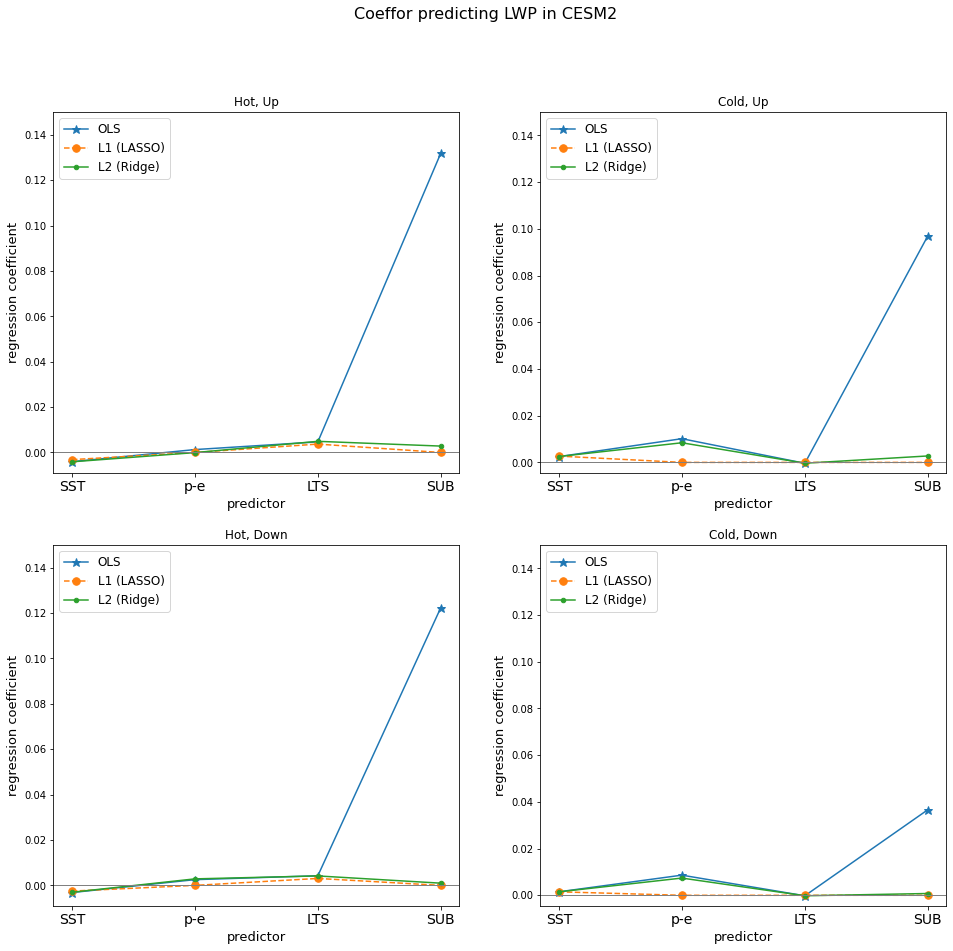

<Figure size 432x288 with 0 Axes>

In [14]:

fig1, ax1=  plt.subplots(2,2, figsize=(16., 14.6))

print(coef_array_ols[:,0])
ax1[0,1].plot(coef_array_ols[:,0][0],'-', markersize=9, marker='*', label='OLS')
ax1[0,1].plot(coef_array_lasso[:,0][0],'.--', markersize=15, label='L1 (LASSO)')
ax1[0,1].plot(coef_array_ridge[:,0][0],'.-', markersize=9, label='L2 (Ridge)')

ax1[0,1].set_xticks(np.arange(0,4))
ax1[0,1].set_xticklabels(["SST", "p-e", "LTS", "SUB"], fontsize=14)
ax1[0,1].set_xlabel('predictor', fontsize=13)
ax1[0,1].set_ylabel('regression coefficient', fontsize=13)
ax1[0,1].axhline(y=0, color='gray', linewidth=1)
ax1[0,1].legend(loc = 'upper left' ,fontsize=12)
# plt.xlim(-.5,4.5)
ax1[0,1].set_ylim(-.0045, 0.15)
ax1[0,1].set_title("Cold, Up", fontsize=12)

ax1[0,0].plot(coef_array_ols[:,0][1],'-', markersize=9, marker='*', label='OLS')
ax1[0,0].plot(coef_array_lasso[:,0][1],'.--', markersize=15, label='L1 (LASSO)')
ax1[0,0].plot(coef_array_ridge[:,0][1],'.-', markersize=9, label='L2 (Ridge)')

ax1[0,0].set_xticks(np.arange(0,4))
ax1[0,0].set_xticklabels(["SST", "p-e", "LTS", "SUB"], fontsize=14)
ax1[0,0].set_xlabel('predictor', fontsize=13)
ax1[0,0].set_ylabel('regression coefficient', fontsize=13)
ax1[0,0].axhline(y=0, color='gray', linewidth=1)
ax1[0,0].legend(loc = 'upper left' ,fontsize=12)
# plt.xlim(-.5,4.5)
ax1[0,0].set_ylim(-.009, 0.15)
ax1[0,0].set_title("Hot, Up", fontsize=12)

ax1[1,1].plot(coef_array_ols[:,0][2],'-', markersize=9, marker='*', label='OLS')
ax1[1,1].plot(coef_array_lasso[:,0][2],'.--', markersize=15, label='L1 (LASSO)')
ax1[1,1].plot(coef_array_ridge[:,0][2],'.-', markersize=9, label='L2 (Ridge)')

ax1[1,1].set_xticks(np.arange(0,4))
ax1[1,1].set_xticklabels(["SST", "p-e", "LTS", "SUB"], fontsize=14)
ax1[1,1].set_xlabel('predictor', fontsize=13)
ax1[1,1].set_ylabel('regression coefficient', fontsize=13)
ax1[1,1].axhline(y=0, color='gray', linewidth=1)
ax1[1,1].legend(loc = 'upper left' ,fontsize=12)
# plt.xlim(-.5,4.5)
ax1[1,1].set_ylim(-.0045, 0.15)
ax1[1,1].set_title("Cold, Down", fontsize=12)

ax1[1,0].plot(coef_array_ols[:,0][3],'-', markersize=9, marker='*', label='OLS')
ax1[1,0].plot(coef_array_lasso[:,0][3],'.--', markersize=15, label='L1 (LASSO)')
ax1[1,0].plot(coef_array_ridge[:,0][3],'.-', markersize=9, label='L2 (Ridge)')

ax1[1,0].set_xticks(np.arange(0,4))
ax1[1,0].set_xticklabels(["SST", "p-e", "LTS", "SUB"], fontsize=14)
ax1[1,0].set_xlabel('predictor', fontsize=13)
ax1[1,0].set_ylabel('regression coefficient', fontsize=13)
ax1[1,0].axhline(y=0, color='gray', linewidth=1)
ax1[1,0].legend(loc = 'upper left' ,fontsize=12)
# plt.xlim(-.5,4.5)
ax1[1,0].set_ylim(-.009, 0.15)
ax1[1,0].set_title("Hot, Down", fontsize=12)



plt.suptitle('Coef' + 'for predicting LWP in CESM2', fontsize=16)
plt.show()

plt.savefig(path6+ "coef_regulari1")

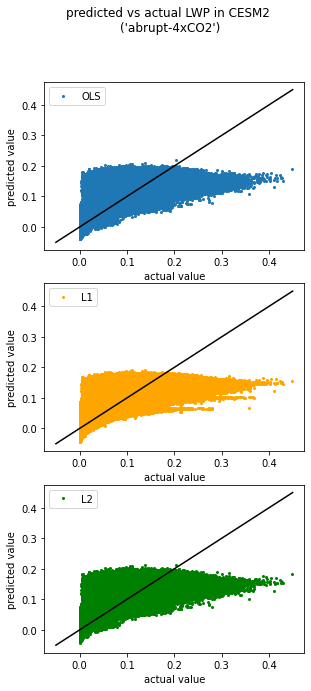

<Figure size 432x288 with 0 Axes>

In [48]:
fig2, ax2 = plt.subplots(3, 1, figsize=(7/1.5, 4.5/1.5*3.5))
MS =4

ax2[0].plot(X_dict['LWP'], predict_dict_abr['value1'], '.', markersize=MS, label='OLS')
ax2[1].plot(X_dict['LWP'], predict_dict_abr['value2'], '.', markersize=MS, c = 'orange', label='L1')
ax2[2].plot(X_dict['LWP'], predict_dict_abr['value3'], '.', markersize=MS, c = 'green', label='L2')

ax2[0].plot((-0.05, 0.45),(-0.05, 0.45),'-k')
ax2[1].plot((-0.05, 0.45),(-0.05, 0.45),'-k')
ax2[2].plot((-0.05, 0.45),(-0.05, 0.45),'-k')

ax2[0].set_xlabel('actual value')
ax2[0].set_ylabel('predicted value')
ax2[0].legend()

ax2[1].set_xlabel('actual value')
ax2[1].set_ylabel('predicted value')
ax2[1].legend()

ax2[2].set_xlabel('actual value')
ax2[2].set_ylabel('predicted value')
ax2[2].legend()

plt.suptitle( "predicted vs actual LWP in CESM2 \n('abrupt-4xCO2')" )
plt.show()

plt.savefig(path6 + "predicted_shape_regulari")

In [16]:
def rdlrm_4_grid_point(X_dict, cut_off1, cut_off2, predictant = 'LWP', CCFs = ['SST', 'p_e', 'LTS', 'SUB'], r = 4):
    # X_dict in shape(t, 10, 73)
    # 'predict_dict' is a dictionary to store the 'predict_label_LWP' and 'predict_value_LWP'
    predict_dict  = {}

    # 'predict_label_LWP' is an array to store the regimes_label
    predict_coef = zeros((X_dict['LWP_mon_bin'].shape[1], X_dict['LWP_mon_bin'].shape[2], len(CCFs)))
    predict_intp = zeros((X_dict['LWP_mon_bin'].shape[1], X_dict['LWP_mon_bin'].shape[2]))

    # 'predictors' is an array that has the need predictors in flatten format;
    predictors = zeros((len(CCFs), X_dict['LWP_mon_bin'].shape[1], X_dict['LWP_mon_bin'].shape[2], X_dict['LWP_mon_bin'].shape[0]))
    print(predictors.shape)  # (4, ..)
    for i in range(X_dict['LWP_mon_bin'].shape[1]):
        
        for j in range(X_dict['LWP_mon_bin'].shape[2]):
            
            for k in range(4):
                # print(i,j,k)
                predictors[k,i,j,:] = X_dict[CCFs[k]+'_mon_bin'][:,i,j]
    predictors = asarray(predictors)
    
    

    # Detecting nan values in the CCFs metrics
    Z  = predictors * 1. 

    ind_false = isnan(Z)

#     ind_true = logical_not(ind_false)
#     print('shape2: ', asarray(nonzero(ind_true==True)).shape)  #.. # of 'non-nan' 
    
#     # Replace 'nan' value in right place
    predictors[ind_false] = 0.0
#     predict_value_LWP[ind_false] = nan
    
    
    #.. Multiple linear regreesion of Liquid Water Path to CCFs:

    for i in range(X_dict['LWP_mon_bin'].shape[1]):
        
        for j in range(X_dict['LWP_mon_bin'].shape[2]):
            
            regr1 = linear_model.LinearRegression()
            result1 = regr1.fit(predictors[:,i,j,:].T, X_dict['LWP_mon_bin'][:,i,j])   #..regression for LWP WITH LTS and skin-T < TR_sst & 'up'
            aeffi = result1.coef_
            aintp = result1.intercept_
            
            predict_coef[i,j,:] = aeffi
            predict_intp[i,j] = aintp
    
    return predict_coef, predict_intp


In [17]:
X_dict = output_4lrm_mon_bin_PI['IPSLCM6ALR']

cut_off1 = 263.5
cut_off2 = 0.0023
CCFs = ['SST', 'p_e', 'LTS', 'SUB']

predict_coef, predict_intp = rdlrm_4_grid_point(X_dict, cut_off1, cut_off2, predictant = 'LWP', CCFs = ['SST', 'p_e', 'LTS', 'SUB'], r = 4)


print(predict_coef.shape)

(4, 10, 73, 1188)
(10, 73, 4)


In [21]:
# standardize the data
predict_coef = (predict_coef - np.mean(predict_coef, axis=(0,1)))/np.std(predict_coef, axis=(0,1))


data = np.zeros((730, 4))

for i in range(4):
    data[:,i] = predict_coef[:,:,i].flatten()

In [23]:
# print(data)
# ----- MODIFY --------
dim = (2,2)                                         # make initial SOM shape
som = MiniSom(dim[0],dim[1],np.shape(data)[1],      # initialize the SOM code
              sigma=1.0, 
              learning_rate = .01, 
              neighborhood_function='gaussian',
              ) 
## use the options below if you want something more like K-means
# dim = (2,2)
# som = MiniSom(dim[0],dim[1],np.shape(data)[1], sigma=.2, learning_rate = .1, neighborhood_function='gaussian')
#----------------------

# initialize with PC weights when your SOM shape is 2D
if(np.min(dim)>1):
    som.pca_weights_init(data)

# train the SOMs 
som.train_random(data, 500, verbose=True)                                   # train over a random subset of the data

print('\n')
codebook = som.get_weights()                                                  # explore the "codebook", i.e. the different cluster centroids
print('codebook.shape = ' + str(np.shape(codebook)))

dataCodebook = som.quantization(data)                                         # get the winning cluster centroid of each sample
print('dataCodebook.shape = ' + str(np.shape(dataCodebook)))                   

dataNeurons = [som.winner(data[i,:]) for i in np.arange(0,data.shape[0]) ]    # get the winning cluster (x,y) coordinate in the som grid (i.e. cluster number)
print('dataNeurons.shape = ' + str(np.shape(dataNeurons)))    

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 1.1747457931814806


codebook.shape = (2, 2, 4)
dataCodebook.shape = (730, 4)
dataNeurons.shape = (730, 2)


# names = ['dLWP/dSST', 'dLWP/dp_e', 'dLWP/dLTS', 'dLWP/SUB']
# plot one particular sample (option for which sample is above)

# ----- MODIFY --------
sample = 710                                       # example sample to explore in detail


neuron_sample = dataNeurons[sample]  # get the winning cluster number for this sample

plt.figure(figsize=(12*.75,6*.75))
plt.plot(data[sample,:], '--',color='tab:gray',label='sample',linewidth=2.5)
plt.plot(dataCodebook[sample], color='tab:purple',label='SOM')
plt.xticks(np.arange(len(names)),names, fontsize = 8)
plt.title('Standarized Data Sample #' + str(sample) + '\nWinning Cluster = ' + str(neuron_sample))
plt.axhline(color='gray',linewidth=.5)
plt.ylim(-4,4)
plt.ylabel('sigma')
plt.legend()
plt.show()

plt.savefig(path6+ 'SOM_710')

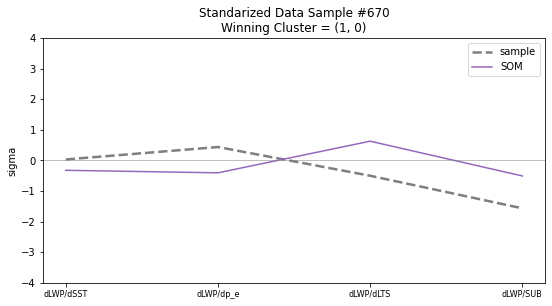

<Figure size 432x288 with 0 Axes>

In [36]:
names = ['dLWP/dSST', 'dLWP/dp_e', 'dLWP/dLTS', 'dLWP/SUB']
# plot one particular sample (option for which sample is above)

# ----- MODIFY --------
sample = 670                                       # example sample to explore in detail


neuron_sample = dataNeurons[sample]  # get the winning cluster number for this sample

plt.figure(figsize=(12*.75,6*.75))
plt.plot(data[sample,:], '--',color='tab:gray',label='sample',linewidth=2.5)
plt.plot(dataCodebook[sample], color='tab:purple',label='SOM')
plt.xticks(np.arange(len(names)),names, fontsize = 8)
plt.title('Standarized Data Sample #' + str(sample) + '\nWinning Cluster = ' + str(neuron_sample))
plt.axhline(color='gray',linewidth=.5)
plt.ylim(-4,4)
plt.ylabel('sigma')
plt.legend()
plt.show()

plt.savefig(path6+ 'SOM_670')

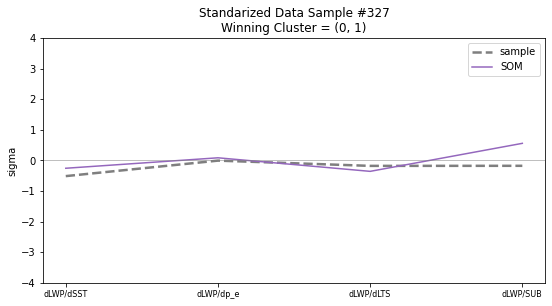

In [34]:
names = ['dLWP/dSST', 'dLWP/dp_e', 'dLWP/dLTS', 'dLWP/SUB']
# plot one particular sample (option for which sample is above)

# ----- MODIFY --------
sample = 327                                       # example sample to explore in detail


neuron_sample = dataNeurons[sample]  # get the winning cluster number for this sample

plt.figure(figsize=(12*.75,6*.75))
plt.plot(data[sample,:], '--',color='tab:gray',label='sample',linewidth=2.5)
plt.plot(dataCodebook[sample], color='tab:purple',label='SOM')
plt.xticks(np.arange(len(names)),names, fontsize = 8)
plt.title('Standarized Data Sample #' + str(sample) + '\nWinning Cluster = ' + str(neuron_sample))
plt.axhline(color='gray',linewidth=.5)
plt.ylim(-4,4)
plt.ylabel('sigma')
plt.legend()
plt.show()

# plt.savefig(path6+ 'SOM_127')

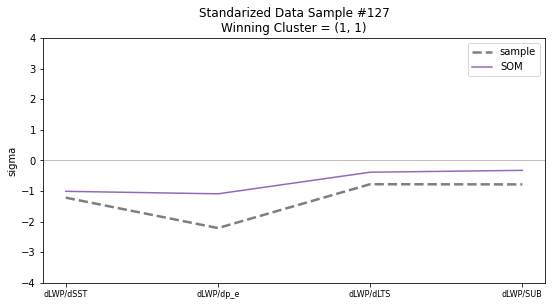

In [37]:
names = ['dLWP/dSST', 'dLWP/dp_e', 'dLWP/dLTS', 'dLWP/SUB']
# plot one particular sample (option for which sample is above)

# ----- MODIFY --------
sample = 127                                       # example sample to explore in detail


neuron_sample = dataNeurons[sample]  # get the winning cluster number for this sample

plt.figure(figsize=(12*.75,6*.75))
plt.plot(data[sample,:], '--',color='tab:gray',label='sample',linewidth=2.5)
plt.plot(dataCodebook[sample], color='tab:purple',label='SOM')
plt.xticks(np.arange(len(names)),names, fontsize = 8)
plt.title('Standarized Data Sample #' + str(sample) + '\nWinning Cluster = ' + str(neuron_sample))
plt.axhline(color='gray',linewidth=.5)
plt.ylim(-4,4)
plt.ylabel('sigma')
plt.legend()
plt.show()

# plt.savefig(path6+ 'SOM_127')

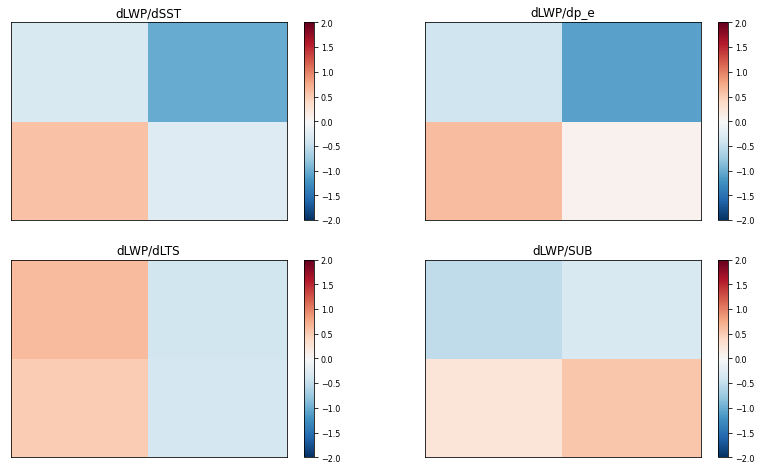

In [39]:
my_cmap = plt.cm.get_cmap('RdBu_r')

# make the plot
plt.figure(figsize=(17*.8,10*.8))
for ind in range(0,np.size(codebook,axis=2)):
    weights = codebook[:,:,ind]
#     weights = np.abs(weights)
#     weights[np.isnan(weights)==True] = 0.
#     weights[weights<=0.] = 1.e-10
    ax = plt.subplot(2, 2, ind+1)
    
    if(np.min(weights.shape[1]==1)):
        weights = np.append(weights,weights,axis=1)
    elif(np.min(weights.shape[0]==1)):    
        weights = np.append(weights,weights,axis=0)

    plt.axis([0, weights.shape[1], 0, weights.shape[0]])
#     if(names[ind] in 'Precip (mm)'):
#         pl = plt.pcolormesh(weights, cmap = my_cmap, norm=colors.LogNorm(vmin=weights.min(), vmax=weights.max()))
#         #pl = plt.pcolor(weights, cmap = my_cmap)
#     else:
    pl = plt.pcolormesh(weights, cmap = my_cmap)

    # plt.plot(neuron_sample[1]+.5,neuron_sample[0]+.5,'*r')
    plt.yticks([])
    plt.xticks([])
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=8) 
    plt.title(names[ind])
    plt.clim(-2,2)
plt.show()

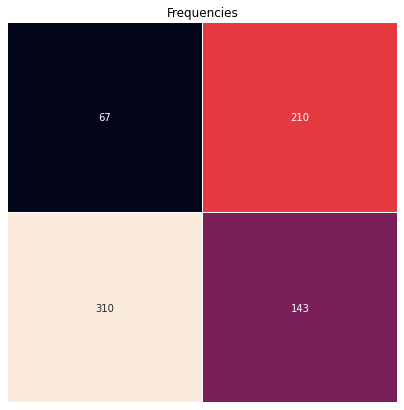

In [40]:
frequencies = np.zeros((dim[0],dim[1]))
x = np.zeros((dim[0],dim[1]))
y = np.zeros((dim[0],dim[1]))
for position, values in som.win_map(data).items():
    frequencies[position[0], position[1]] = len(values)
    x[position[0], position[1]] = position[0]
    y[position[0], position[1]] = position[1]
    
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(np.flipud(frequencies), annot=True, fmt='g', linewidths=.5, ax=ax, cbar=False)
ax.axis('off')
plt.title('Frequencies') 
plt.show()

In [45]:
prep step1: coef_array

# store coefficients as an array: coef_array_18

coef3 =  []
coef4 =  []
coef5 =  []
coef6 =  []

itcp3 =  []
itcp4 =  []
itcp5 =  []
itcp6 =  []

coef_array_18 = []




# Retrieved the 4-lrm coefficients:
for j in range(len(deck2)):
    a_lt_up  = output_LRM_sstlt_up[deck_nas2[j]][0].copy()
    a_le_up  = output_LRM_sstle_up[deck_nas2[j]][0].copy()
    a_lt_dn  = output_LRM_sstlt_down[deck_nas2[j]][0].copy()
    a_le_dn  = output_LRM_sstle_down[deck_nas2[j]][0].copy()
    
    a0_lt_up  = output_LRM_sstlt_up[deck_nas2[j]][1]
    a0_le_up  = output_LRM_sstle_up[deck_nas2[j]][1]
    a0_lt_dn  = output_LRM_sstlt_down[deck_nas2[j]][1]
    a0_le_dn  = output_LRM_sstle_down[deck_nas2[j]][1]
    
    coef_array_18.append([[a_lt_up, a0_lt_up], [a_le_up, a0_le_up], [a_lt_dn, a0_lt_dn], [a_le_dn, a0_le_dn]]) 
    
    
    # print(m, t, e, f)
    coef3.append(a_lt_up)
    coef4.append(a_le_up)
    coef5.append(a_lt_dn)
    coef6.append(a_le_dn)
    
    itcp3.append(array(a0_lt_up))
    itcp4.append(array(a0_le_up))
    itcp5.append(array(a0_lt_dn))
    itcp6.append(array(a0_le_dn))
    
coef3 = 1000. * np.asarray(coef3)
coef4 = 1000. * np.asarray(coef4)
coef5 = 1000. * np.asarray(coef5)
coef6 = 1000. * np.asarray(coef6)

itcp3 = 1000. *np.asarray(itcp3)
itcp4 = 1000. *np.asarray(itcp4)
itcp5 = 1000. *np.asarray(itcp5)
itcp6 = 1000. *np.asarray(itcp6)

    
# print(itcp3,' ', itcp4,' ', itcp5,' ', itcp6 )

coef_array_18 = array(coef_array_18)
# print(coef_array_18)
# Shape in (18,4, 2).


# print(coef_array_18[:, 0, 0][0])
# print(coef_array_18[:, 0, 0])
print(coef3)

print(coef4)

[[ 2.46647882e+00  5.12382489e+01 -7.43141375e-01  3.84128130e+02]
 [ 6.23297486e-01  9.79973203e+00 -2.80152903e-02  1.46506524e+02]
 [ 2.45166402e+00  1.02023602e+01 -3.96205850e-01  9.50482192e+01]
 [ 1.85528469e+00  5.47318147e+00 -1.70717458e-01  1.31066489e+02]
 [ 2.46351597e+00  9.55055731e+00 -3.66916855e-01  9.60016240e+01]
 [ 4.27458200e-01  6.35900135e+00  1.46176336e-01  2.58143617e+01]
 [ 2.35693177e+00  3.94646847e+01  4.98720082e-01  6.80373511e+01]
 [ 2.40268458e+00  4.21577063e+01  6.37188018e-01  6.19080180e+01]
 [ 3.87828314e-01  6.51844978e+00  2.66024587e-02  2.72498735e+01]
 [ 7.05721758e-01  2.40699316e+01  3.77302860e-01  9.49525940e+01]
 [ 7.62759889e-01  2.12937019e+01  3.24097269e-01  1.21681743e+02]
 [ 5.60898335e-01 -1.98941251e-01  4.03594087e-02  1.17527411e+02]
 [ 1.56493353e+00  9.97642508e+00  2.38498766e-01  4.78870066e+01]
 [ 1.17680347e+00  5.08037886e+00  8.67822449e-02  1.51128957e+00]
 [ 2.93882121e-01  7.89807763e+00  2.74584728e-02  4.77022864e

In [46]:
# set figure defaults

mpl.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (12.0/2, 8.0/2)

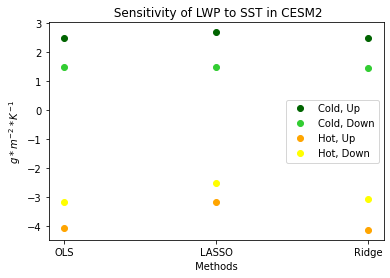

In [71]:
plt.figure()

plt.plot([1, 2, 3], 1000*np.asarray([coef_array_ols[0,0][0], coef_array_lasso[0,0][0], coef_array_ridge[0,0][0]]),marker = 'o', linestyle = '', color = 'darkgreen',markersize =6, label="Cold, Up")

plt.plot([1, 2, 3], 1000*np.asarray([coef_array_ols[2,0][0], coef_array_lasso[2,0][0], coef_array_ridge[2,0][0]]),marker = 'o', linestyle = '', color = 'limegreen',markersize =6, label="Cold, Down")

plt.plot([1, 2, 3], 1000*np.asarray([coef_array_ols[1,0][0], coef_array_lasso[1,0][0], coef_array_ridge[1,0][0]]),marker = 'o', linestyle = '', color = 'orange', markersize =6, label="Hot, Up")
plt.plot([1, 2, 3], 1000*np.asarray([coef_array_ols[3,0][0], coef_array_lasso[3,0][0], coef_array_ridge[3,0][0]]),marker = 'o', linestyle = '', color = 'yellow',markersize =6, label="Hot, Down")


# plotting set

plt.xticks(np.arange(1, 4), ["OLS", "LASSO", "Ridge"])
plt.legend()
plt.xlabel(" Methods ")
plt.ylabel("$g*m^{-2}*K^{-1} $")
plt.title(" Sensitivity of LWP to SST in CESM2")

plt.savefig("coef_sst_regulari")

Text(0.5, 1.0, ' Sensitivity of LWP to p-e ')

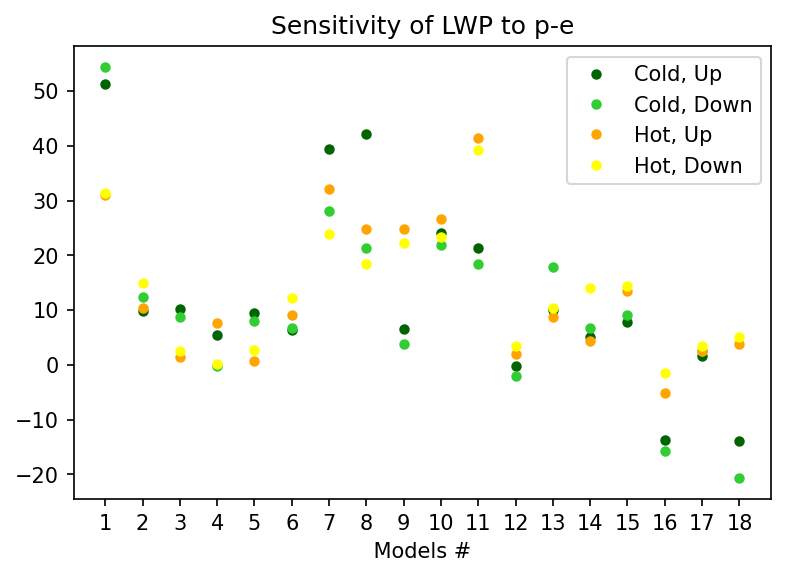

In [51]:
plt.figure()

plt.plot(np.arange(1, 19), coef3[:,1], marker = 'o', linestyle = '', color = 'darkgreen',markersize =4, label="Cold, Up")

plt.plot(np.arange(1, 19), coef5[:,1], marker = 'o', linestyle = '', color = 'limegreen',markersize =4, label="Cold, Down")

plt.plot(np.arange(1, 19), coef4[:,1], marker = 'o', linestyle = '', color = 'orange', markersize =4, label="Hot, Up")

plt.plot(np.arange(1, 19), coef6[:,1], marker = 'o', linestyle = '', color = 'yellow',markersize =4, label="Hot, Down")


# plotting set

plt.xticks(np.arange(1, 19), range(1, 19))
plt.legend()
plt.xlabel(" Models # ")
# plt.ylabel("$g*m^{-2}*K $")
plt.title(" Sensitivity of LWP to p-e ")

In [7]:
theta_700 =  np.asarray([12., 21.05, 36, 1240, 365., 987, 214., 316])
LTS_m = np.ones((8))

LTS_e  = np.ma.masked_where(theta_700 >= 500,LTS_m)

print(np.isnan(LTS_e))

[False False False -- False -- False False]
